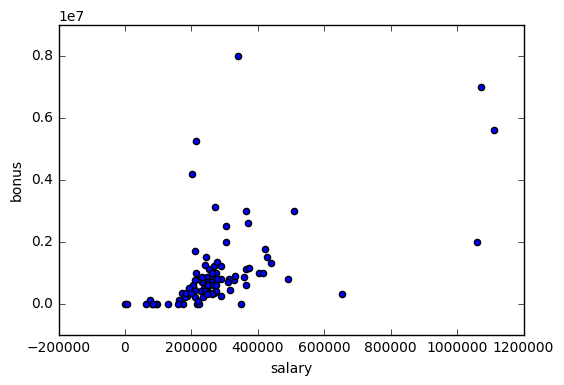

In [2]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
import numpy as ns

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
data_dict.pop( "TOTAL", 0 )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

#max_salary = ns.amax(data[:,0])
#max_bonus  = ns.amax(data[:,1])

sorted_salary = ns.sort(data[:,0])
sorted_bonus  = ns.sort(data[:,1])
#print sorted_salary, sorted_bonus

#print data
#for key, value in data_dict.items():
    #print value["salary"] , value["bonus"] , key
    #if value["salary"] == max_salary: #and value["bonus"] == max_bonus:
        #print key

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [8]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    import numpy as np
    new_size = int(len(predictions) * 0.9)
    cleaned_data = np.zeros((new_size, 3))
    #print cleaned_data, type(cleaned_data), cleaned_data.ndim

    #print "predictions - ", len(predictions)
    #print "ages - "       , len(ages)
    #print "net_worths - " , len(net_worths)

    errors   = (predictions - net_worths)
    sqr_list = errors.flatten()
    sortedlist = sorted(sqr_list)
    threshold = sortedlist[new_size - 1]
    #print sqr_list, type(sqr_list), sqr_list.ndim
    count = 0
    for i in range(len(sqr_list)):
        if sqr_list[i] <= threshold:
            cleaned_data[count][0] = ages[i][0]
            cleaned_data[count][1] = net_worths[i][0]
            cleaned_data[count][2] = sqr_list[i]
            count += 1
            
    #cleaned_data.view('i8,i8,i8').sort(order=['f1'], axis=0)
    #print cleaned_data, type(cleaned_data), cleaned_data.ndim, len(cleaned_data)
   
    #print cleaned_data
    #print "count = ", count
    
    return cleaned_data


Making data much more cleaner

Difference between clean and non-clean data

Ignore errors but paying attention to unusual events

Train -> Remove points with the larger error -> Train -> Compare

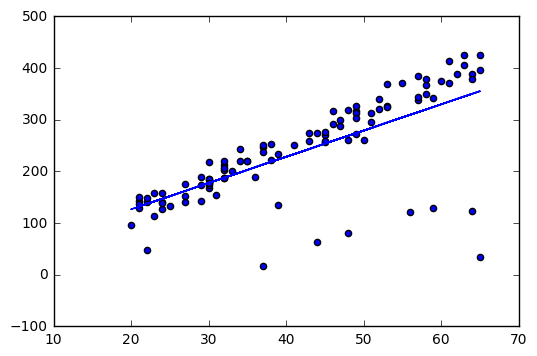

slope =  [[ 6.36859481]]
score =  0.983189455396


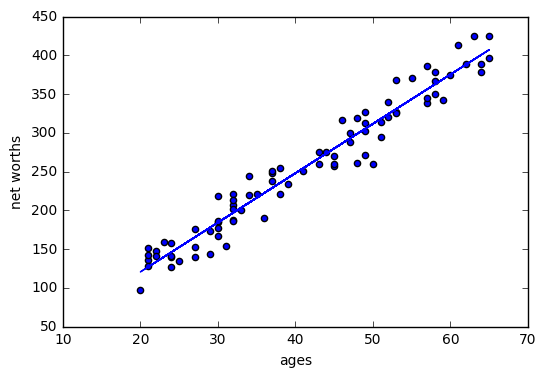

In [11]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages = pickle.load( open("outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("outliers/practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit cleaned data!
    try:
        reg.fit(ages, net_worths)

        print "slope = ", reg.coef_
        print "score = ", reg.score(ages_test, net_worths_test)

        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "don't seem to have regression imported/created,"
        print "or else your regression object isn't named reg"
        print "either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"
